In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import math
import datetime

In [2]:
df = pd.read_csv('data\covid-19-cases-by-notification-date-and-postcode-local-health-district-and-local-government-area.csv')

display(df.head(5))

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
0,2020-01-22,2134.0,X700,Sydney,11300.0,Burwood (A)
1,2020-01-24,2121.0,X760,Northern Sydney,16260.0,Parramatta (C)
2,2020-01-25,2071.0,X760,Northern Sydney,14500.0,Ku-ring-gai (A)
3,2020-01-25,2033.0,X720,South Eastern Sydney,16550.0,Randwick (C)
4,2020-01-30,2350.0,X800,Hunter New England,10130.0,Armidale Regional (A)


In [3]:
df.notification_date = pd.to_datetime(df.notification_date)
df.postcode.dropna(inplace=True)

trunc = lambda x: math.trunc(1000 * x) / 1000;
df.postcode = df.postcode.apply(trunc)
df['cases'] = 1
display(df.head(5))
display(df.shape)

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,cases
0,2020-01-22,2134.0,X700,Sydney,11300.0,Burwood (A),1
1,2020-01-24,2121.0,X760,Northern Sydney,16260.0,Parramatta (C),1
2,2020-01-25,2071.0,X760,Northern Sydney,14500.0,Ku-ring-gai (A),1
3,2020-01-25,2033.0,X720,South Eastern Sydney,16550.0,Randwick (C),1
4,2020-01-30,2350.0,X800,Hunter New England,10130.0,Armidale Regional (A),1


(2926, 7)

In [4]:
# df.groupby(['postcode'])['cases'].sum()
df['cases_cumulative_postcode'] = df.groupby(['postcode'])['cases'].cumsum()
# df.index = df.notification_date
display(df)

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,cases,cases_cumulative_postcode
0,2020-01-22,2134.0,X700,Sydney,11300.0,Burwood (A),1,1
1,2020-01-24,2121.0,X760,Northern Sydney,16260.0,Parramatta (C),1,1
2,2020-01-25,2071.0,X760,Northern Sydney,14500.0,Ku-ring-gai (A),1,1
3,2020-01-25,2033.0,X720,South Eastern Sydney,16550.0,Randwick (C),1,1
4,2020-01-30,2350.0,X800,Hunter New England,10130.0,Armidale Regional (A),1,1
...,...,...,...,...,...,...,...,...
2921,2020-04-15,2088.0,X760,Northern Sydney,15350.0,Mosman (A),1,42
2922,2020-04-16,2430.0,X800,Hunter New England,15240.0,Mid-Coast (A),1,16
2923,2020-04-16,2560.0,X710,South Western Sydney,11500.0,Campbelltown (C) (NSW),1,17
2924,2020-04-16,NaN,NaN,NaN,NaN,NaN,1,2017357895952


In [5]:
# grouped_cumulative = df.groupby(['notification_date','postcode'])['notification_date'].count()
# grouped_cumulative
pivoted_df = pd.pivot_table(df,values='cases_cumulative_postcode',index=['notification_date','postcode']).unstack().fillna(method='ffill').fillna(0)
display(pivoted_df)

cases_cumulative_postcode                              \
postcode                             0.0    1871.0 2000.0 2007.0 2008.0   
notification_date                                                         
2020-01-22                              0.0    0.0    0.0    0.0    0.0   
2020-01-24                              0.0    0.0    0.0    0.0    0.0   
2020-01-25                              0.0    0.0    0.0    0.0    0.0   
2020-01-30                              0.0    0.0    0.0    0.0    0.0   
2020-02-21                              0.0    0.0    0.0    0.0    0.0   
2020-02-26                              0.0    0.0    0.0    0.0    0.0   
2020-02-27                              0.0    0.0    0.0    0.0    0.0   
2020-02-29                              0.0    0.0    0.0    0.0    0.0   
2020-03-01                              0.0    0.0    0.0    0.0    0.0   
2020-03-02                              0.0    0.0    0.0    0.0    0.0   
2020-03-03                              0.0    0.0    0.0    0.0    0.0   
2020-03-04                              1.0    0.0    0.0    0.0    0.0   
2020-03-05                              1.0    0.0    0.0    0.0    0.0   
2020-03-06                              1.0    0.0    0.0    0.0    0.0   
2020-03-07                              1.0    0.0    0.0    0.0    0.0   
2020-03-08                              1.0    0.0    0.0    0.0    0.0   
2020-03-09                              1.0    0.0    0.0    0.0    0.0   
2020-03-10                              1.0    0.0    0.0    0.0    0.0   
2020-03-11                              1.0    0.0    0.0    0.0    0.0   
2020-03-12                              1.0    0.0    0.0    0.0    0.0   
2020-03-13                              1.0    0.0    0.0    0.0    0.0   
2020-03-14                              1.0    0.0    0.0    0.0    1.0   
2020-03-15                              1.0    0.0    1.0    0.0    1.0   
2020-03-16                              1.0    0.0    1.0    0.0    1.0   
2020-03-17                              1.0    0.0    1.0    0.0    1.0   
2020-03-18                              1.0    0.0    2.5    0.0    1.0   
2020-03-19                              1.0    0.0    4.0    0.0    1.0   
2020-03-20                              1.0    1.0    5.5    0.0    1.0   
2020-03-21                              2.0    1.0    5.5    0.0    1.0   
2020-03-22                              2.0    1.0    5.5    0.0    1.0   
2020-03-23                              2.0    1.0    8.0    1.5    1.0   
2020-03-24                              2.0    1.0    8.0    1.5    1.0   
2020-03-25                              2.0    1.0   10.0    3.0    1.0   
2020-03-26                              2.0    1.0   11.0    3.0    1.0   
2020-03-27                              3.0    1.0   11.0    3.0    1.0   
2020-03-28                              3.0    1.0   11.0    4.0    1.0   
2020-03-29                              4.0    1.0   11.0    4.0    2.0   
2020-03-30                              4.0    1.0   11.0    6.0    2.0   
2020-03-31                              6.5    1.0   11.0    6.0    3.0   
2020-04-01                              9.5    3.5   12.0    6.0    4.0   
2020-04-02                              9.5    3.5   13.5    6.0    4.0   
2020-04-03                              9.5    3.5   13.5    6.0    4.0   
2020-04-04                              9.5    3.5   15.0    6.0    4.0   
2020-04-05                              9.5    3.5   15.0    6.0    4.0   
2020-04-06                              9.5    3.5   16.0    6.0    4.0   
2020-04-07                              9.5    3.5   16.0    6.0    4.0   
2020-04-08                              9.5    3.5   16.0    8.0    4.0   
2020-04-09                              9.5    3.5   16.0    9.0    4.0   
2020-04-10                              9.5    3.5   16.0    9.0    4.0   
2020-04-11                              9.5    3.5   16.0    9.0    4.0   
2020-04-12                              9.5

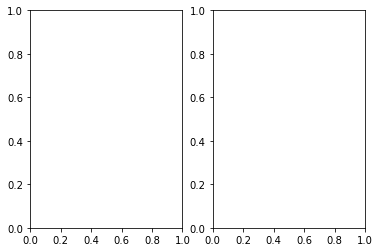

In [6]:
fig, a = plt.subplots(1,2)
# plt.show()

In [7]:
import bar_chart_race as bcr
bcr_html = bcr.bar_chart_race(
    df=pivoted_df,
    filename='test.mp4',
    orientation='h',
    sort='desc',
    label_bars=True,
    use_index=True,
    n_bars=10,
    title='COVID-19 Cases by Postcode NSW',
    fig=fig)
    # steps_per_period=10,
    # period_length=500,
    # figsize=(6.5, 3.5),
    # cmap='dark24',
    
    # bar_label_size=7,
    # tick_label_size=7,
    # period_label_size=16,
    # fig=None)

# HTML(bcr_html)

In [8]:
# clean_week = df[df.notification_date>=(datetime.datetime.now()-datetime.timedelta(hours=150))].dropna(axis=1,how='all')
# clean_week


In [9]:
# fig, ax = plt.subplots(figsize=(15, 8))
# ax.barh(clean_week.index,clean_week.cases_cumulative_postcode)
# ax.barh(clean_week.index, clean_week.)